## Face Mask Detection Project


we get the data from :https://www.kaggle.com/datasets/omkargurav/face-mask-dataset?resource=download

# Importing the Dependencies

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


In [18]:
# Set the paths of image to folders 
with_mask_folder = r'D:\Project\AI Project\Face Mask Detection Dataset\data\data\with_mask'

without_mask_folder = r'D:\Project\AI Project\Face Mask Detection Dataset\data\data\without_mask'

# Function to load and resize images
def load_and_resize_images(folder):
    images = []
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        img = cv2.imread(image_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize images to 128x128
            images.append(img)
        else:
            print(f"Failed to load image: {image_path}")  # Print error if image not loaded
    print(f"Loaded {len(images)} images from folder: {folder}")
    return images


# Load and resize images with masks
with_mask_images = load_and_resize_images(with_mask_folder)

# Load and resize images without masks
without_mask_images = load_and_resize_images(without_mask_folder)


Loaded 3725 images from folder: D:\Project\AI Project\Face Mask Detection Dataset\data\data\with_mask
Loaded 3828 images from folder: D:\Project\AI Project\Face Mask Detection Dataset\data\data\without_mask


# Creating Labels for two class of Image
With mask    --> 1

without mask --> 0

In [3]:
# Creating labels for Images
with_mask_labels = np.ones(len(with_mask_images))


without_mask_labels = np.zeros(len(without_mask_images))

In [4]:
# Concatenate the images and labels
X = np.array(with_mask_images + without_mask_images)
Y = np.concatenate((with_mask_labels , without_mask_labels), axis=0)

## Train Test Split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [6]:
# Print shapes for confirmation

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (6042, 128, 128, 3)
Y_train shape: (6042,)
X_test shape: (1511, 128, 128, 3)
Y_test shape: (1511,)


In [7]:
# Scaling the data 
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## Building a Convolution Neural Networks (CNN)

In [8]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


c:\Users\Alargam Mohamed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the neural networks
model.compile(optimizer= "adam",
              loss= 'sparse_categorical_crossentropy', 
              metrics=['acc'])

In [10]:
history = model.fit(X_train_scaled, Y_train, validation_split= 0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 124ms/step - acc: 0.7274 - loss: 0.6340 - val_acc: 0.8926 - val_loss: 0.2611
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - acc: 0.8661 - loss: 0.3270 - val_acc: 0.9091 - val_loss: 0.2328
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - acc: 0.8943 - loss: 0.2527 - val_acc: 0.9025 - val_loss: 0.2556
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - acc: 0.9020 - loss: 0.2437 - val_acc: 0.9174 - val_loss: 0.2174
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - acc: 0.9254 - loss: 0.1961 - val_acc: 0.9240 - val_loss: 0.2038


## Model Evaluation

In [11]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9166 - loss: 0.1887
Test Accuracy = 0.9245532751083374


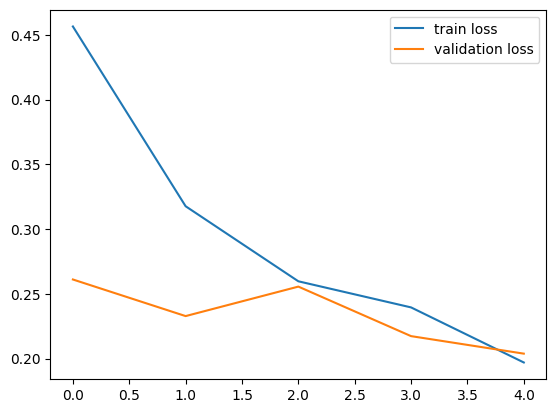

In [12]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label= 'train loss')
plt.plot(h.history['val_loss'], label= 'validation loss')
plt.legend()
plt.show()

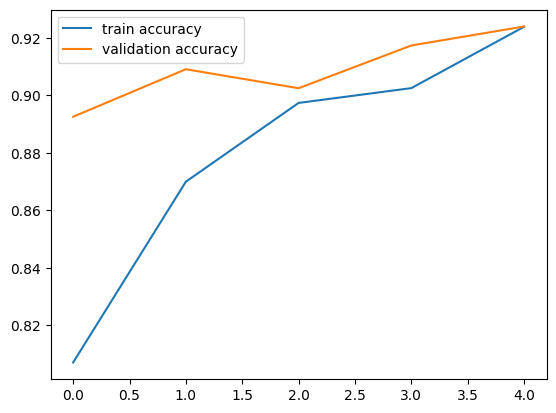

In [13]:
# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

## Prediction System

In [14]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, (1,128,128,3))
input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1
The person in the image is wearing a mask
